In [1]:
import os
import pydicom
import glob
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from scipy.interpolate import UnivariateSpline
from skimage.draw import polygon2mask

In [2]:
def readDicom(path):
    pi = os.path.basename(path).split('_')[1]
    dcm_size = len(glob.glob(path+'/*.dcm'))
    dcms = [path+'/E'+pi+'S101I%d.dcm'%dicom_slicei for dicom_slicei in range(1,dcm_size+1)]
    dcm_f = pydicom.read_file(dcms[0]).pixel_array
    dcm_size = max(dcm_f.shape)
    dcm_img = np.zeros((dcm_size,dcm_size,len(dcms)))
    for dcmi in range(len(dcms)):
        cdcm = pydicom.read_file(dcms[dcmi]).pixel_array
        dcm_img[dcm_size//2-cdcm.shape[0]//2:dcm_size//2+cdcm.shape[0]//2,
                dcm_size//2-cdcm.shape[1]//2:dcm_size//2+cdcm.shape[1]//2,dcmi] = cdcm
    return dcm_img

def listContourSlices(qvsroot, dcm_img):
    avail_slices = []
    qvasimg = qvsroot.findall('QVAS_Image')
    for dicom_slicei in range(dcm_img.shape[2]):
        conts = qvasimg[dicom_slicei - 1].findall('QVAS_Contour')
        if len(conts):
            avail_slices.append(dicom_slicei)
    return avail_slices

def getContour(qvsroot,dicomslicei,conttype,dcmsz=720):
    qvasimg = qvsroot.findall('QVAS_Image')
    if dicomslicei - 1 > len(qvasimg):
        print('no slice', dicomslicei)
        return
    assert int(qvasimg[dicomslicei - 1].get('ImageName').split('I')[-1]) == dicomslicei
    conts = qvasimg[dicomslicei - 1].findall('QVAS_Contour')
    tconti = -1
    for conti in range(len(conts)):
        if conts[conti].find('ContourType').text == conttype:
            tconti = conti
            break
    if tconti == -1:
        print('no such contour', conttype)
        return
    pts = conts[tconti].find('Contour_Point').findall('Point')
    contours = []
    for pti in pts:
        contx = float(pti.get('x')) / 512 * dcmsz 
        conty = float(pti.get('y')) / 512 * dcmsz 
        #if current pt is different from last pt, add to contours
        if len(contours) == 0 or contours[-1][0] != contx or contours[-1][1] != conty:
            contours.append([contx, conty])
    return np.array(contours)
def readOneDicom(path):
    slice1 = pydicom.read_file(slice1Name).pixel_array
    dcm_size = max(slice1.shape)
    dcm_img = np.zeros((dcm_size, dcm_size))
    dcm_img[dcm_size//2-slice1.shape[0]//2:dcm_size//2+slice1.shape[0]//2,
            dcm_size//2-slice1.shape[1]//2:dcm_size//2+slice1.shape[1]//2] = slice1
    return dcm_img

In [61]:
myDir = 'C:/Users/linhai/Desktop/segmentation/vesselWall/careIIChallenge/careIIChallenge'
case = os.listdir(myDir)[0]
pi = case.split('_')[1]
dirDcm1 = myDir+'/'+case
slice1Name = dirDcm1+'/E'+pi+'S101I%d.dcm'%1
dcm_img = readOneDicom(slice1Name)
#dcm_img.shape
'''
arti='ICAL'
cas_dir = dirDcm1+'/CASCADE-'+'ICAL'
qvs_path = cas_dir+'/E'+pi+'S101_L.QVS'
qvsroot = ET.parse(qvs_path).getroot()
avail_slices = listContourSlices(qvsroot, dcm_img)
print('case',pi,'art',arti,'avail_slices',avail_slices)
dicom_slicei = avail_slices[0]
lumen_cont = getContour(qvsroot,dicom_slicei,'Lumen')
wall_cont = getContour(qvsroot,dicom_slicei,'Outer Wall')
'''
dcm_img.shape

(720, 720)

In [6]:
myDir = './careIIChallenge/careIIChallenge'
filelist=[]
lumen_conts=[]
wall_conts =[]
for casei in os.listdir(myDir):
    print(len(filelist))
    pi = casei.split('_')[1]
    dcm_img = readDicom(myDir+'/'+casei)           
    for arti in ['ICAL','ICAR','ECAL','ECAR']:
        cas_dir = myDir+'/'+casei+'/CASCADE-'+arti
        qvs_path = cas_dir+'/E'+pi+'S101_L.QVS'
        qvsroot = ET.parse(qvs_path).getroot()
        avail_slices = listContourSlices(qvsroot, dcm_img)
        for dicom_slicei in avail_slices:
            filelist.append(myDir+'/'+casei+'/'+'E'+pi+'S101I%d.dcm'%dicom_slicei )
            lumen_conts.append(getContour(qvsroot,dicom_slicei,'Lumen'))
            wall_conts.append(getContour(qvsroot,dicom_slicei,'Outer Wall'))
            
            

0
122
210
294
452
533
644
644
747
878
973
1071
1169
1231
1359
1461
1606
1685
1830
1917
2026
2131
2212
2321
2464


In [13]:
conts_lens = []
for l in lumen_conts:
    conts_lens.append(l.shape[0])
    
max(conts_lens)
#min(conts_lens)
#len(conts_lens)

256

Dcm shape (720, 720, 720)
case P176 art ICAL avail_slices [318, 323, 328, 333, 338, 343, 348, 353, 358, 363, 368, 373, 378, 383, 388, 393, 398, 403, 408, 413, 418, 423, 428, 433, 438, 443, 448, 453, 458, 463, 468, 473]
Displaying the contours for the first slice for ICAL
tensor(1.)


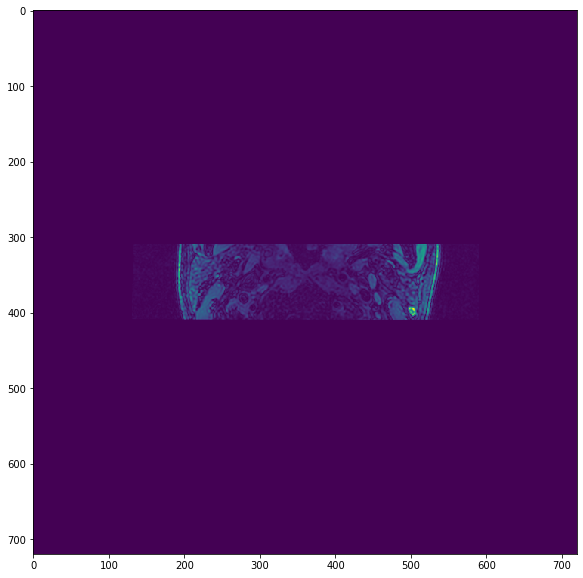

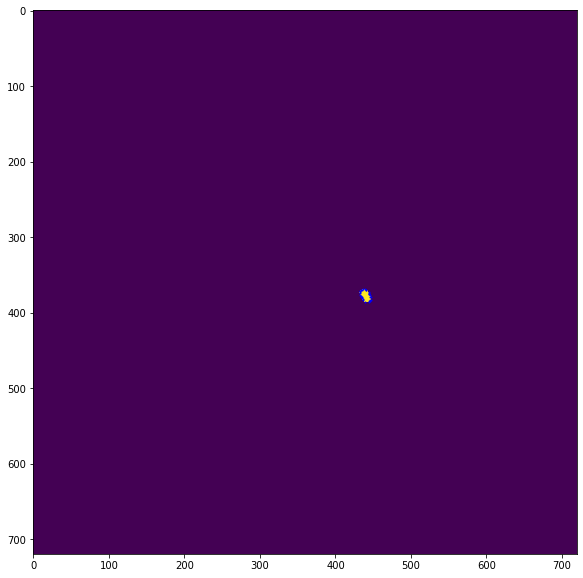

case P176 art ICAR avail_slices [253, 258, 263, 268, 273, 278, 283, 288, 293, 298, 303, 308, 313, 318, 323, 328, 333, 338, 342, 343, 348, 353, 358, 363, 368, 373, 378, 383, 388, 393, 398, 401, 403, 408, 413, 418, 423, 428, 433, 438, 443, 448, 453, 458, 463, 468, 473, 478, 483, 488, 493, 498, 503, 508, 513, 515]
Displaying the contours for the first slice for ICAR
tensor(1.)


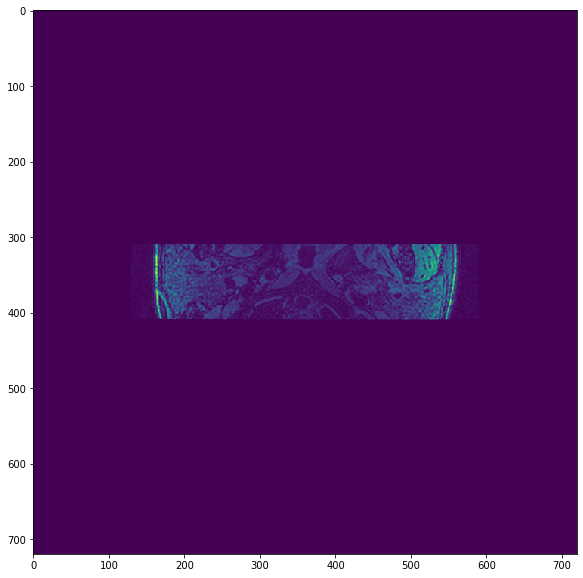

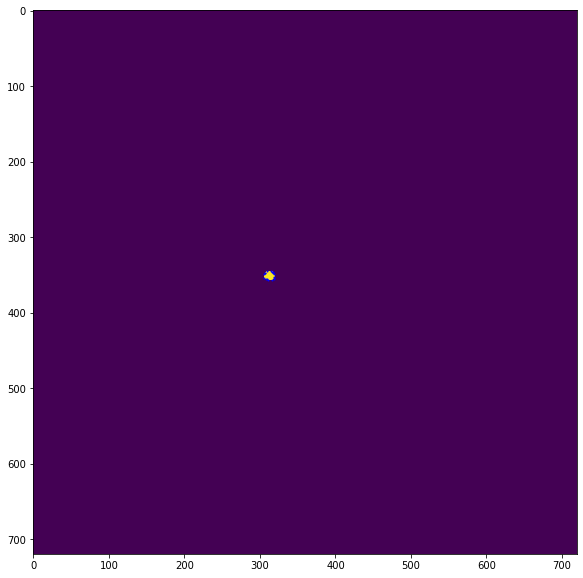

case P176 art ECAL avail_slices []
case P176 art ECAR avail_slices []
88


In [22]:
from imantics import Polygons, Mask
import torch
cdir = './careIIChallenge/careIIChallenge'
count = 0
for casei in os.listdir(cdir)[1:2]:
    pi = casei.split('_')[1]
    dcm_img = readDicom(cdir+'/'+casei)
    print('Dcm shape',dcm_img.shape)
    
    for arti in ['ICAL','ICAR','ECAL','ECAR']:
        cas_dir = cdir+'/'+casei+'/CASCADE-'+arti
        qvs_path = cas_dir+'/E'+pi+'S101_L.QVS'
        qvsroot = ET.parse(qvs_path).getroot()
        avail_slices = listContourSlices(qvsroot, dcm_img)
        print('case',pi,'art',arti,'avail_slices',avail_slices)
        count += len(avail_slices)
        if len(avail_slices):
            dicom_slicei = avail_slices[0]
            print('Displaying the contours for the first slice for',arti)
            lumen = getContour(qvsroot,dicom_slicei,'Lumen')
            mask = np.zeros((1,720,720), dtype=np.float32)
            mask = polygon2mask((720,720), lumen)
            mask = np.transpose(mask)
            #wall_cont = getContour(qvsroot,dicom_slicei,'Outer Wall')
            plt.figure(figsize=(10,10))
            plt.imshow(dcm_img[:,:,dicom_slicei])
            polygons =Mask(mask).polygons()
            a = polygons.points
            a = np.array(a)
            mask = torch.tensor(mask, dtype=torch.float32)
            print (mask.max())

            plt.figure(figsize=(10,10))
            plt.imshow(mask)
            plt.plot(a[0,:,0],a[0,:,1],'bo',markersize=1)
            plt.show()
            #plt.plot(lumen[:,0],lumen[:,1],'ro',markersize=1)
            #plt.plot(wall_cont[:,0],wall_cont[:,1],'bo',markersize=1)
            plt.show()
print(count)
